This notebook explores the Austin's lobbyist registration dataset, after the city's 2017 expansion of the range of lobbyist data it publishes and changes to the format of the data tables.

In [1]:
import pandas as pd

df = pd.read_csv("../data/Lobbyist_-_Clients.csv")

In [2]:
df = df.sort_values("CLIENT_LAST_NAME")

In [3]:
date = pd.read_csv("../data/Lobbyist_-_Reports.csv")

In [4]:
dates = pd.merge(df, date[["REPORT_ID","REPORT_DATE"]], how='left', on="REPORT_ID")

In [5]:
dates

,CLIENT_ID,REPORT_ID,REGISTRANT_ID,CLIENTENTITY_CD,CLIENT_TITLE,CLIENT_FIRST_NAME,CLIENT_MI,CLIENT_LAST_NAME,CLIENT_SUFFIX,CLIENT_ADR1,CLIENT_ADR2,CLIENT_CITY,CLIENT_STATE,CLIENT_ZIP,BUSINESS_DESC,COMP_CATEGORY,COMP_EXACT_AMOUNT,COMP_COMMENT,Row_ID,REPORT_DATE
0,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",Suite 236,Miramar Beach,FL,32550,Property Owner,NaN,NaN,NaN,R20170901095457-C0040,08/30/2017
1,C0040,R20171031124151,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",Suite 236,Miramar Beach,FL,32550,Property Owner,NaN,NaN,NaN,R20171031124151-C0040,10/16/2017
2,C0036,R20171130160530,RG0132,Entity,NaN,NaN,NaN,"183 BLW, LP",NaN,PO BOX 9190,NaN,AUSTIN,TX,78766,REAL ESTATE INVESTMENT/ DEVELOPMENT,NaN,NaN,NaN,R20171130160530-C0036,11/20/2017
3,C0036,R20180221105850,RG0142,Entity,NaN,NaN,NaN,"183 BLW, LP",NaN,PO BOX 9190,NaN,AUSTIN,TX,78766,REAL ESTATE INVESTMENT/ DEVELOPMENT,NaN,NaN,NaN,R20180221105850-C0036,02/20/2018
4,C0036,R20171122113731,RG0018,Entity,NaN,NaN,NaN,"183 BLW, LP",NaN,PO BOX 9190,NaN,AUSTIN,TX,78766,REAL ESTATE INVESTMENT/ DEVELOPMENT,NaN,NaN,NaN,R20171122113731-C0036,11/07/2017
5,C0036,R20171115161738,RG0070,Entity,NaN,NaN,NaN,"183 BLW, LP",NaN,PO BOX 9190,NaN,AUSTIN,TX,78766,REAL ESTATE INVESTMENT/ DEVELOPMENT,NaN,NaN,NaN,R20171115161738-C0036,11/07/2017
6,C0036,R20171115142049,RG0065,Entity,NaN,NaN,NaN,"183 BLW, LP",NaN,PO BOX 9190,NaN,AUSTIN,TX,78766,REAL ESTATE INVESTMENT/ DEVELOPMENT,NaN,NaN,NaN,R20171115142049-C0036,11/07/2017
7,C0036,R20171113152000,RG0061,Entity,NaN,NaN,NaN,"183 BLW, LP",NaN,PO BOX 9190,NaN,AUSTIN,TX,78766,REAL ESTATE INVESTMENT/ DEVELOPMENT,NaN,NaN,NaN,R20171113152000-C0036,11/07/2017
8,C0036,R20171122114728,RG0057,Entity,NaN,NaN,NaN,"183 BLW, LP",NaN,PO BOX 9190,NaN,AUSTIN,TX,78766,REAL ESTATE INVESTMENT/ DEVELOPMENT,NaN,NaN,NaN,R20171122114728-C0036,11/07/2017
9,C0041,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"2208 Lake Austin, LLC",NaN,2208 Lake Austin Blvd.,NaN,Austin,TX,78703,Property Owner,NaN,NaN,NaN,R20170901095457-C0041,08/30/2017


In [6]:
mq = pd.read_csv("../data/Lobbyist_-_Municipal_Questions.csv")

In [7]:
mq

,REPORT_ID,MQ_ID,REGISTRANT_ID,MQ_DESC,RP_YN,SM_OTHER_DESC,Row_ID
0,R20170703170748,Q0001,RG0017,"Wage, health, and safety standards for Austin'...",N,NaN,R20170703170748-Q0001
1,R20170703190233,Q0001,RG0097,"Convention & Tourism Issues (Promotion, Sales ...",N,NaN,R20170703190233-Q0001
2,R20170718142458,Q0006,RG0101,Traffic Impact Analysis,Y,NaN,R20170718142458-Q0006
3,R20170718150200,Q0001,RG0039,"Lobbying on behalf of Argyle Residential, LLC ...",Y,NaN,R20170718150200-Q0001
4,R20170731114209,Q0019,RG0061,ENTITLEMENTS RELATED TO LAND DEVELOPMENT,Y,NaN,R20170731114209-Q0019
5,R20170731114209,Q0020,RG0061,ENTITLEMENTS RELATED TO LAND DEVELOPMENT,Y,NaN,R20170731114209-Q0020
6,R20170731114209,Q0023,RG0061,ENTITLEMENTS RELATED TO LAND DEVELOPMENT,Y,NaN,R20170731114209-Q0023
7,R20170731114209,Q0024,RG0061,ENTITLEMENTS RELATED TO LAND DEVELOPMENT,Y,NaN,R20170731114209-Q0024
8,R20170731114209,Q0021,RG0061,ENTITLEMENTS RELATED TO LAND DEVELOPMENT,Y,NaN,R20170731114209-Q0021
9,R20170731114209,Q0025,RG0061,ENTITLEMENTS RELATED TO LAND DEVELOPMENT,Y,NaN,R20170731114209-Q0025


In [8]:
# Linking the clients to the questions they lobbied on

dq = pd.merge(dates, mq, how='left', on=["REPORT_ID","REGISTRANT_ID"])

In [9]:
pd.options.display.max_colwidth = 500
dq

,CLIENT_ID,REPORT_ID,REGISTRANT_ID,CLIENTENTITY_CD,CLIENT_TITLE,CLIENT_FIRST_NAME,CLIENT_MI,CLIENT_LAST_NAME,CLIENT_SUFFIX,CLIENT_ADR1,...,COMP_CATEGORY,COMP_EXACT_AMOUNT,COMP_COMMENT,Row_ID_x,REPORT_DATE,MQ_ID,MQ_DESC,RP_YN,SM_OTHER_DESC,Row_ID_y
0,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0045,"Lobbying on behalf of Atlantic Pacific Communities, LLC regarding various land development issues.",N,NaN,R20170901095457-Q0045
1,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0064,"Lobbying on behalf of LDG Norwood, L.P. regarding various zoning issues.",N,NaN,R20170901095457-Q0064
2,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0065,Lobbying on behalf of Andra Liemandt regarding various zoning issues.,N,NaN,R20170901095457-Q0065
3,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0066,Lobbying on behalf of Joseph Liemandt regarding various zoning issues.,N,NaN,R20170901095457-Q0066
4,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0067,"Lobbying on behalf of Mariposa Real Estate, LLC regarding various zoning issues.",N,NaN,R20170901095457-Q0067
5,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0059,Lobbying on behalf of Anthony George regarding various permit issues.,N,NaN,R20170901095457-Q0059
6,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0068,"Lobbying on behalf of McAdams Enterprises, LLC regarding various zoning issues.",N,NaN,R20170901095457-Q0068
7,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0069,Lobbying on behalf of Mill Creek Residential Trust regarding various land development issues.,N,NaN,R20170901095457-Q0069
8,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0070,Lobbying on behalf of Lampros Moumouris regarding various permit/zoning issues.,N,NaN,R20170901095457-Q0070
9,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0071,Lobbying on behalf of The NRP Group regarding various zoning issues.,N,NaN,R20170901095457-Q0071


In [10]:
# Adding new column for a beneficiary of lobbying who isn't the client of the lobbyist

dq["BENEFICIARY"] = dq["MQ_DESC"].str.extract('Lobbying on behalf of (.+) regarding (?:.+)', expand=False)

# Shortening some answers from the form

dq["TOPIC"] = dq["MQ_DESC"].str.extract('Lobbying on behalf of (?:.+) regarding (?:various )?(.+)(?: issues.)', expand=False)
dq["TOPIC"] = dq["TOPIC"].fillna(dq['MQ_DESC'].str.extract('Lobbying on behalf of (?:.+) regarding (?:various )?(.+)', expand=False))
dq["TOPIC"] = dq['TOPIC'].fillna(dq['MQ_DESC']).str.strip(".")
dq['MQ_DESC'] = dq['TOPIC']
dq = dq.drop(columns=['TOPIC'])

In [11]:
dq

,CLIENT_ID,REPORT_ID,REGISTRANT_ID,CLIENTENTITY_CD,CLIENT_TITLE,CLIENT_FIRST_NAME,CLIENT_MI,CLIENT_LAST_NAME,CLIENT_SUFFIX,CLIENT_ADR1,...,COMP_EXACT_AMOUNT,COMP_COMMENT,Row_ID_x,REPORT_DATE,MQ_ID,MQ_DESC,RP_YN,SM_OTHER_DESC,Row_ID_y,BENEFICIARY
0,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0045,land development,N,NaN,R20170901095457-Q0045,"Atlantic Pacific Communities, LLC"
1,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0064,zoning,N,NaN,R20170901095457-Q0064,"LDG Norwood, L.P."
2,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0065,zoning,N,NaN,R20170901095457-Q0065,Andra Liemandt
3,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0066,zoning,N,NaN,R20170901095457-Q0066,Joseph Liemandt
4,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0067,zoning,N,NaN,R20170901095457-Q0067,"Mariposa Real Estate, LLC"
5,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0059,permit,N,NaN,R20170901095457-Q0059,Anthony George
6,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0068,zoning,N,NaN,R20170901095457-Q0068,"McAdams Enterprises, LLC"
7,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0069,land development,N,NaN,R20170901095457-Q0069,Mill Creek Residential Trust
8,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0070,permit/zoning,N,NaN,R20170901095457-Q0070,Lampros Moumouris
9,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0071,zoning,N,NaN,R20170901095457-Q0071,The NRP Group


## Which clients hired the most lobbyists to work on the most issues?

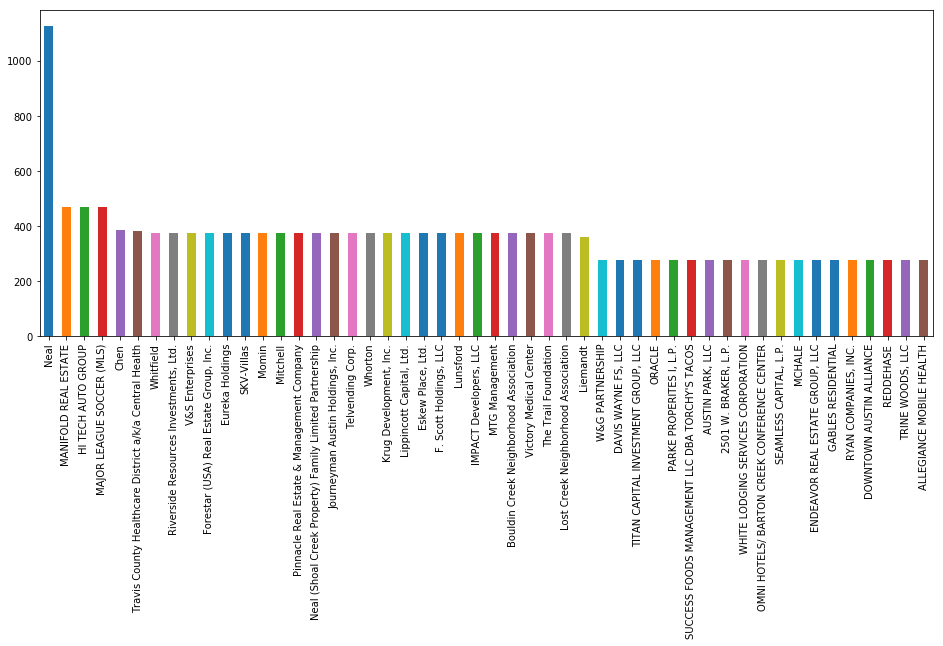

In [12]:
%matplotlib inline
plotDF = dq["CLIENT_LAST_NAME"].value_counts()[:50].plot(kind='bar', figsize=(16,6))

## Who, other than direct clients, had the most lobbying done on their behalf?

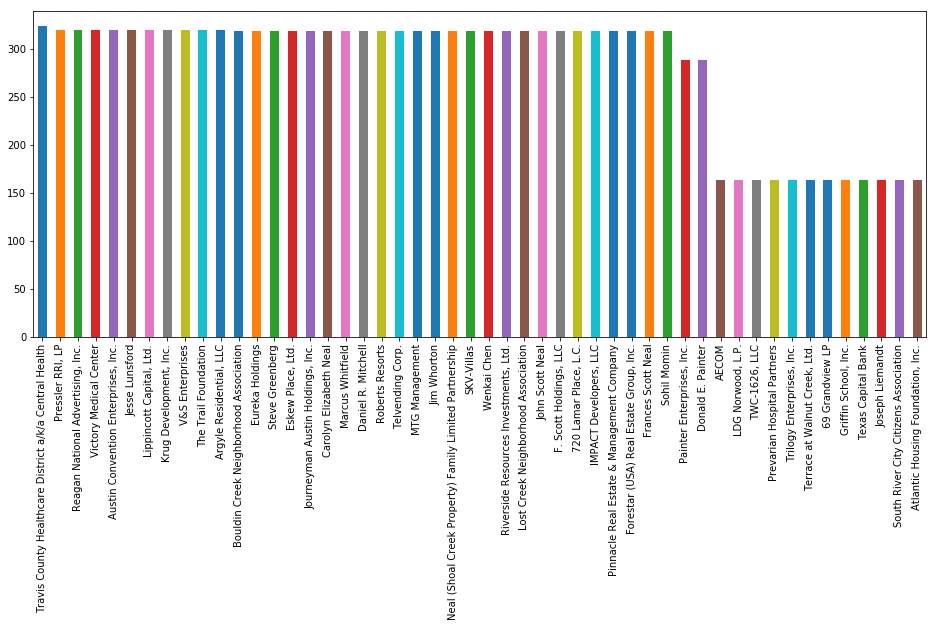

In [13]:
plotDF = dq["BENEFICIARY"].value_counts()[:50].plot(kind='bar', figsize=(16,6))

In [14]:
# These data tables link preset categories to the subject matter of the lobbying.
# How should that be integrated into a visualization?

kvp = pd.read_csv("../data/Lobbyist_-_Municipal_Question_Subject_Matter_Key-Value_Pairs.csv")
sm = pd.read_csv("../data/Lobbyist_-_Subject_Matter_List.csv")

In [ ]:
# Joining the datasets into a single table this way causes the number of rows to explode.
# It might be better to do a separate lookup to access the SM_ID column.

dqsm = pd.merge(dq, kvp[["MQ_ID","REPORT_ID","SM_ID"]], how='left', on=["MQ_ID","REPORT_ID"])

In [ ]:
dqsm

In [ ]:
dqsml = pd.merge(dqsm, sm[["SM_ID","SM_CATEGORY_DESC"]], how='left', on="SM_ID")

In [ ]:
dqsml[:5]

In [ ]:
# This will use the registrant's free text to fill the "Subject Matter" column when none of the pre-defined
# categories was selected.

dqsml["SM_CATEGORY_DESC"] = dqsml["SM_CATEGORY_DESC"].fillna(value=dqsml["SM_OTHER_DESC"])

In [ ]:

dqsml = dqsml.drop(columns=['Row_ID_x', 'Row_ID_y', 'SM_ID'])

In [ ]:
dqsml

In [ ]:
dqsm[dqsm["REPORT_ID"] == "R20170710112719"]

In [ ]:
dx = dqsml.groupby(['REPORT_ID', 'REGISTRANT_ID','CLIENT_ID'])['SM_CATEGORY_DESC'].agg(lambda x: set(x))

In [ ]:
# nan values correspond to the ID "SM_Other".

dx[:10]

In [ ]:
dqsml[dqsml["REPORT_ID"]=="R20170710112719"]

In [ ]:
df = dqsml.set_index(['REPORT_ID', 'REGISTRANT_ID','CLIENT_ID'])

In [ ]:
df["SM_CATEGORY_DESC"] = dx

In [ ]:
df = df.reset_index().drop_duplicates(subset=['REPORT_ID', 'REGISTRANT_ID','CLIENT_ID'])

In [ ]:
df["CLIENT_LAST_NAME"].nunique()